In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Função para resolver o problema
Implementação do método explícito com diferenças finitas progressivas no espaço e avançadas no tempo.


In [ ]:
def resolver_adveccao(t_total, n, L, u, dt, T_A, T_inicial):
    """
    Resolve a equação de advecção 1D (EDP hiperbólica de 1ª ordem) usando o método
    de diferenças finitas explícito.
    
    Parâmetros:
    t_total : Tempo total de simulação
    n       : Número de nós espaciais
    L       : Comprimento da barra
    u       : Velocidade de advecção
    dt      : Passo de tempo
    T_A     : Condição de contorno em x=0 (Dirichlet)
    T_inicial: Temperatura inicial da barra (constante ou perfil)
    """
    
    # 1. Discretização
    dx = L / (n - 1)
    Nt = int(np.ceil(t_total / dt)) # Número de passos de tempo
    
    # Cria o vetor de posições x
    x = np.linspace(0, L, n)
    
    # 2. Verificação da Condição CFL (Estabilidade)
    # Courant-Friedrichs-Lewy: C = |u| * dt / dx <= 1
    C = abs(u) * dt / dx
    if C > 1:
        print(f"AVISO: Condição de CFL violada! C = {C:.4f} > 1. A solução será instável.")
    else:
        # Apenas imprime na primeira chamada para não poluir
        pass 
        
    # 3. Condição Inicial
    T = np.full(n, T_inicial)
    
    # 4. Loop no Tempo
    for k in range(Nt):
        T_novo = np.copy(T)
        
        # Fórmula Explícita (u > 0):
        # T_i^{k+1} = T_i^k - C * (T_i^k - T_{i-1}^k)
        # Nota: O último nó (índice n-1) será sobrescrito pela cond. de contorno depois
        
        # Cálculo vetorizado para i = 1 até n-1 (índice Python)
        # T_novo[1:] = T[1:] - C * (T[1:] - T[:-1]) 
        T_novo[1:-1] = T[1:-1] - C * (T[1:-1] - T[:-2])
        
        # 5. Condições de Contorno
        
        # x = 0: Dirichlet (Temperatura constante T_A)
        T_novo[0] = T_A
        
        # x = L: Neumann (Fluxo nulo -> dT/dx = 0)
        # Aproximação: T_n = T_{n-1} (Derivada nula implica temperatura igual ao vizinho)
        T_novo[-1] = T_novo[-2]
        
        # Atualiza vetor para o próximo passo
        T = T_novo

    return T, x, C

## Parâmetros do Problema
Definição das constantes conforme o item 6 do PDF.

In [4]:
L = 1.0           # Comprimento da barra (m)
u = 0.1           # Velocidade de advecção (m/s)
n = 101           # Número de nós no espaço (dx = 1.0/100 = 0.01m)
dt = 0.05         # Passo no tempo (s)
t_total = 5.0     # Tempo total de simulação (s)
T_inicial = 20.0  # Condição Inicial: T(x,0) = 20 °C
T_A = 100.0       # Contorno em x=0: T(0,t) = 100 °C

## Execução e Verificação de Estabilidade
Executa a solução para o tempo final e verifica o número de Courant.

In [5]:
T_final, x, Courant = resolver_adveccao(t_total, n, L, u, dt, T_A, T_inicial)

print(f"Simulação concluída.")
print(f"Número de Courant (CFL): {Courant:.4f}")
if Courant <= 1:
    print("Condição de estabilidade satisfeita (C <= 1).")
else:
    print("ATENÇÃO: Solução instável!")

# Mostra alguns valores do perfil final
print("\nPrimeiros 10 valores de T no tempo final:")
print(T_final[:10])

Simulação concluída.
Número de Courant (CFL): 0.5000
Condição de estabilidade satisfeita (C <= 1).

Primeiros 10 valores de T no tempo final:
[100. 100. 100. 100. 100. 100. 100. 100. 100. 100.]


## Gráfico da Evolução Temporal
O gráfico abaixo mostra como a frente de temperatura ("degrau" de 100°C) avança pela barra ao longo do tempo. Como $u=0.1$ m/s e $t=5.0$ s, a frente deve ter percorrido aproximadamente $0.5$ m (metade da barra).


<>:19: SyntaxWarning: invalid escape sequence '\D'
<>:19: SyntaxWarning: invalid escape sequence '\D'
<>:19: SyntaxWarning: invalid escape sequence '\D'
<>:19: SyntaxWarning: invalid escape sequence '\D'
C:\Users\vinic\AppData\Local\Temp\ipykernel_7496\1374017032.py:19: SyntaxWarning: invalid escape sequence '\D'
  plt.title(f'Evolução da Advecção na Barra (Método Explícito)\n$u={u} m/s$, $\Delta x={L/(n-1):.3f} m$, $\Delta t={dt} s$ (CFL={Courant:.2f})')
C:\Users\vinic\AppData\Local\Temp\ipykernel_7496\1374017032.py:19: SyntaxWarning: invalid escape sequence '\D'
  plt.title(f'Evolução da Advecção na Barra (Método Explícito)\n$u={u} m/s$, $\Delta x={L/(n-1):.3f} m$, $\Delta t={dt} s$ (CFL={Courant:.2f})')


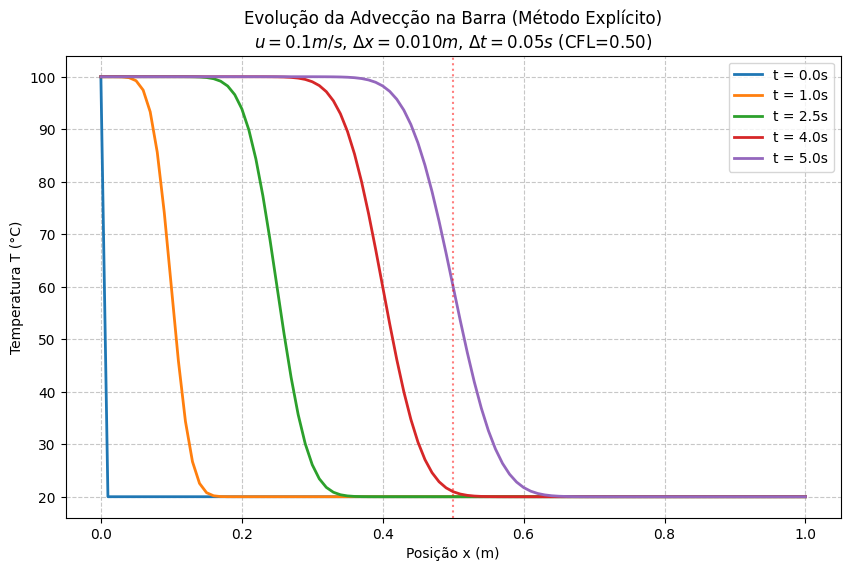

In [ ]:
# Tempos para plotar
tempos_para_plotar = [0.0, 1.0, 2.5, 4.0, 5.0]

plt.figure(figsize=(10, 6))

for t in tempos_para_plotar:
    if t == 0:
        # Condição inicial manual para plot
        T_plot = np.full(n, T_inicial)
        T_plot[0] = T_A # Ajuste visual do contorno
    else:
        T_plot, _, _ = resolver_adveccao(t, n, L, u, dt, T_A, T_inicial)
    
    plt.plot(x, T_plot, label=f't = {t}s', linewidth=2)

# Detalhes do Gráfico
plt.xlabel('Posição x (m)')
plt.ylabel('Temperatura T (°C)')
plt.title(f'Evolução da Advecção na Barra (Método Explícito)\n$u={u} m/s$, $\Delta x={L/(n-1):.3f} m$, $\Delta t={dt} s$ (CFL={Courant:.2f})')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Linha vertical indicando onde a frente deveria estar em t=5s (Teórico: x = u*t = 0.5m)
plt.axvline(x=u*5.0, color='red', linestyle=':', alpha=0.5, label='Posição Teórica (t=5s)')

plt.savefig('grafico_adveccao.png')
plt.show()